#I. Intoduction

Face verification (face recognition) are the one of the most interesting and exciting applications of Deep Neural Networks. The demand for face recognition, verification or classification systems is increasing, as the need for recognizing and classifying many people increases for many purposes, like surveillance of a crowd, passengers at an airport, bus stand, and so on. It is also used in many mobile phones applications e.g. for unlocking a device or mobile payment platform. Under the recent criticism, it must be admitted that it is still useful application designed to make people’s lives better. In order to fulfill user expectations and limited computation resources, the facial recognition solutions are deployed locally on mobile devices, so they are expected to be accurate as well as very small and extremely fast.

Face recognition is a process of identifying people from the image. Processed face is matched with the database of known faces. Deep learning is one of the state-of-art approaches which gained state-of-art performance on face recognition.

The main motivation of our experiments was to improve well-known models architectures by applying different Deep Learning Metrics. We decided to choose following deep learning architectures: FaceNet, MobileFaceNet and LightCNN. All chosen architectures were state-of-the-art gamechangers in the time they were launched. Moreover, not only deep learning architectures for face recognition tasks have been constantly developing but Deep Learning Metrics as well. Some  deep metrics can be used for older architectures as well as recent ones in order to improve quality of model performance. All proposed changes are validated with proposed metrics learning on well known LFW dataset as well as a set of personal photos - typical home gallery of photos with high resolution - the dataset that no models had change to train or validate on it.

The paper has been written by Hanna Danilovich and Radosław Suwała (in cooperation).

# II. Datasets 

## 1. Training data

VGGFace2 dataset was used for models training in experiments section. It is a well-known, large-scale face dataset released in 2016 to evaluate face recognition architectures. It replaced the VGGFace dataset released in 2015 with 2.6 million images covering 2,622 people. The dataset contains above 3 million images of 9131 identities. It contains a wide range of ethnicities, including more Chinese and Indian faces than VGGFace and professions (e.g. politicians and athletes). Images have been downloaded from Google Image Search and have large variations in pose, age, illumination, ethnicity and profession. The dataset is approximately gender-balanced, with 59.3% males, varying between 80 and 843 images for each identity.

Due to technical and time limitations we did a sample of 2055 identities splitting it up into two subsamples – for training (1644 identities, 80% of initial sample) and validation (411 identities, 20% of initial sample) purposes.


## 2. Validation Data

### a. Labeled Faces in the Wild (LFW)

Labeled Faces in the Wild (LFW) is a public dataset commonly used as a benchmark for face recognitiona and verification tasks. It was published in 2007. The dataset contains more than 13 thousand images of 5749 people faces. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the dataset. The only constraint on these faces is that they were detected by the Viola-Jones face detector.


### b. Dataset of personal photos (FACES_DD)

Personal photos (FACES_DD) dataset is a set of private photos taken between 2003 and 2009. It contains 925 high resolution photos (6 Mpix on average) with 2690 labeled faces. Among the faces 1205 faces for 10 identities are labeledd with personal initials twarzy. Initials and distribution is presented below:

AM': 11,
'AS': 6,
'BO': 24,
'DD': 186,
'KWD': 307,
'OO': 27,
'RO': 22,
'TM': 10,
'ZBD': 583,
'ZD': 29.

Not labeled with initials faces (1485 faces) were labeled as 'Other' and removed from the dataset.

# IV. Models and methods review

## 1. FaceNet

FaceNet is the facial recognition system that was proposed in 2015 by Florian Schroff, Dmitry Kalenichenko, James Philbin (Google researchers) in an article 'FaceNet: A Unified Embedding for Face Recognition and Clustering'. It achieved state-of-the-art results in the many benchmarks for face recognition tasks.

The model provides a unified embedding - map of each face image to a vector of 128 numbers which represent the most important features. Other words, the model compresses a face image into a vector of 128 numbers using a deep convolutional network. Created vectors are embedded into a euclidean space such that the distances in that space correspond to face similarity, so embeddings of similar faces are placed closer in multidimensional space. The main achievement of FaceNet is that it learns the mapping from the images and creates embeddings rather than using any bottleneck layer for face recognition task.

FaceNet proposed by the authors uses GoogLeNet style Inception model. Inception network architecture uses multiple filters of different sizes in parallel and concatenate results. The inception layer concept is the main idea behind sparsely connected architecture. The architecture is presented in the $Figure \ 1$.

$Figure \ 1. \ The \ architecure \ of \ FaceNet \ model.$ 
\
($Source:$ https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/)
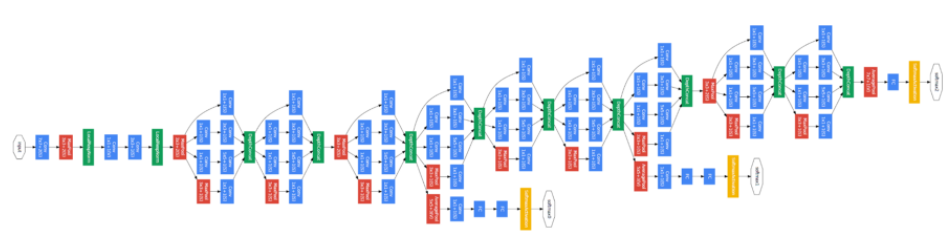


Proposed Inception layer *'(...) is a combination of all those layers (namely, 1×1 Convolutional layer, 3×3 Convolutional layer, 5×5 Convolutional layer) with their output filter banks concatenated into a single output vector forming the input of the next stage.'* In addition, there are $1×1$ Convolutional layer before applying another layer used for dimensionality reduction and a parallel Max Pooling layer. The architecture of Inception layer is presented in the $Figure \ 2$.




$Figure \ 2. \ Inception \ layer’s \ structure.$ 
\
($Source:$ https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/)
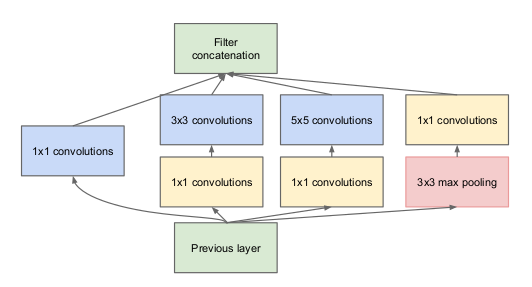

The overall architecture with all the specifications is presented in the $Table \ 1$.



$Table \ 1. \ Architecture \ of \ Inception \ model.$
\
($Source:$ https://arxiv.org/pdf/1503.03832v3.pdf)

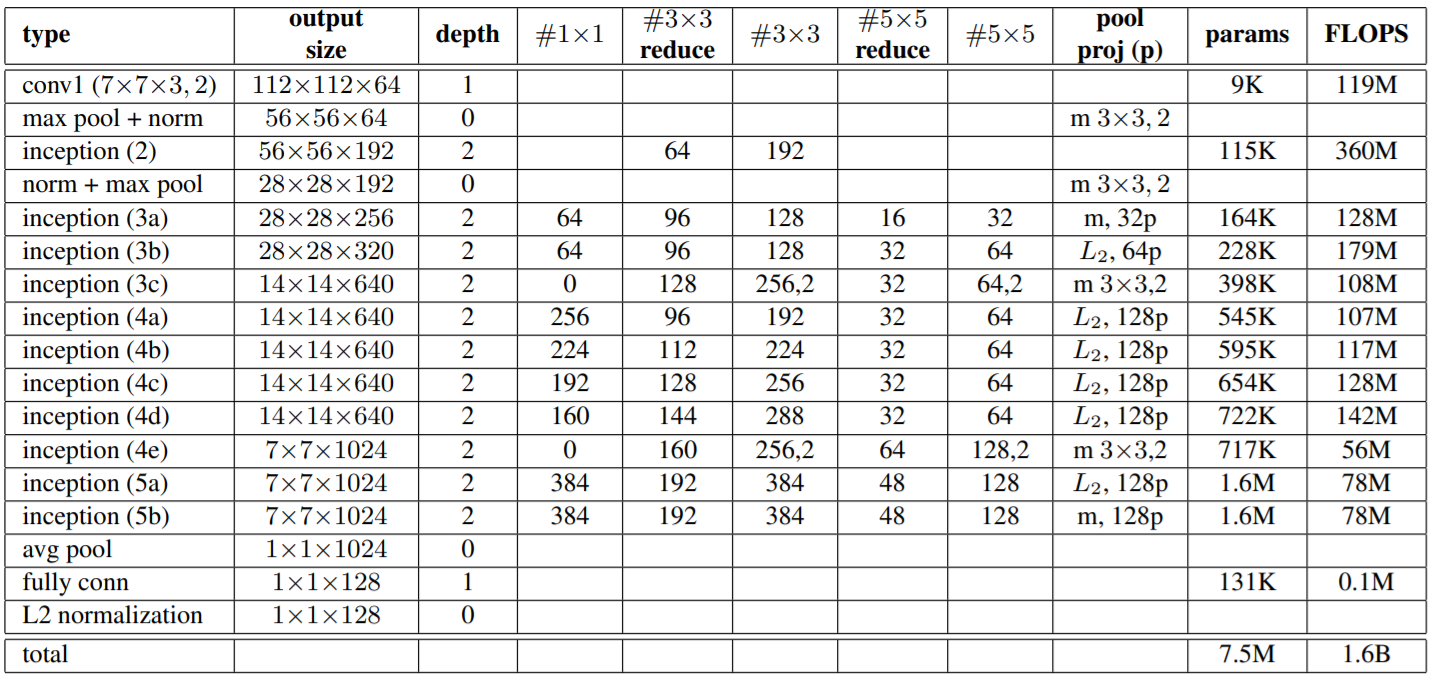

For training purposes triplet loss function is used. The idea of using the function in the architecture is to enforce a margin between faces of different identities. The idea behaind triplet loss function is presented in next chapter.

## 2. MobileFaceNet

A class of efficient CNN models - MobileFaceNets - was introduced by Sheng Chen, Yang Liu, Xiang Gao and Zhen Han in their article 'MobileFaceNets: Efficient CNNs for Accurate RealTime Face Verification on Mobile Devices' in 2018. MobileFaceNet class uses less than 1 million parameters and is specifically tailored for high-accuracy real-time face verification on mobile and embedded devices. The model's architecture is a development of known in that time efficient neural networks for common visual recognition tasks e.g. MobileNetV1, ShuffleNet and MobileNetV2. The efficiency was proven during the experiment where MobileFaceNet architecture with less than 1 million parameters and under the same experimental conditions achieve significantly better accuracy as well as more than 2 times actual speedup over MobileNetV2.

MobileFaceNet architecture was inspired by the MobileNetV2 architecture. The residual bottlenecks applied in MobileNetV2 were used. ReLU function for non-linearity was replaced by PReLU funtion, which turned out to be better suited for facial recognition. At the beginning of the network downsampling strategy (based on pooling layer to reduce the spatial size of the representation, the number of parameters and amount of computation) and a linear 1×1 convolution layer following a linear global depthwise convolution layer as the feature output layer (Features Map, FMap) were used. Authors replaced global average pooling layers, which were commonly used in most state-of-the-art mobile neural networks for visual recognition tasks in that time, with depthwise convolution layer. MobileFaceNet was trained with ArcFace loss function.

Features Map conception was widely used in the models for facial verification tasks and it is presented on $Figure \ 3$. It presents a typical face feature embedding produces by CNN architecture and the receptive field (RF). The last 7x7 feature map is denoted as FMap. RF1 and RF2 correspond to the corner unit and the center unit in FMap respectively.

The receptive field of RF2 covers entire image and the receptive field of RF1 covers only a part of the face image. Widly used global average pooling in competitive architectures treats RF1 and RF2 as equivalent. RF2 should be given a greater weight and RF1 should be less weighted. Other words, global average pooling treats all values ​​on the feature map as equally important.


$Figure \ 3. \ Face \ feature \ embedding \ and \ the \ receptive \ field \ (RF).$
\
$Source:$ https://arxiv.org/ftp/arxiv/papers/1804/1804.07573.pdf)

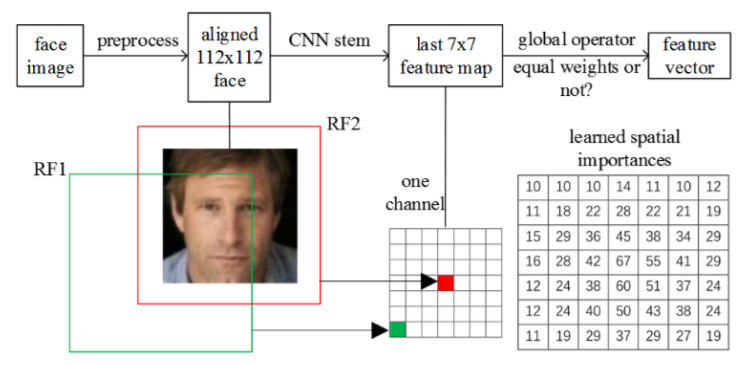


Detailed structure of MobileFaceNet architecture is shown in $Table \ 2$. Batch normalization is utilized during training. The first layer of each sequence has a stride $s$ (see $Table \ 2.$) and all others use stride 1. All spatial convolutions in the bottlenecks use 3 × 3 kernels. The expansion factor $t$ (see $Table \ 2.$) is always applied to the input size. GDConv7x7 layer denotes $GDConv$ (Global Depthwise Convolution) layer of 7 × 7 kernels.


$Table \ 2. \ MobileFaceNet \ architecture \ for \ feature \ embedding.$
\
($Source:$ https://arxiv.org/ftp/arxiv/papers/1804/1804.07573.pdf)
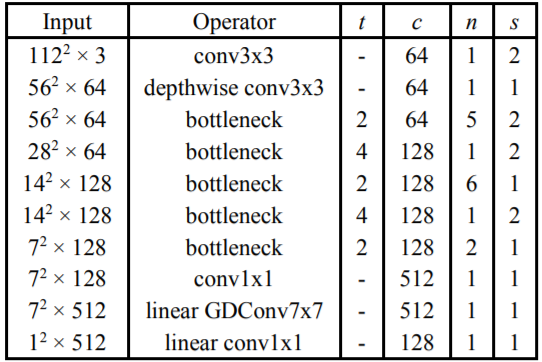

Depthwise convolution layer contains kernel size equaling the input size, padding equaling to 0 and stride equaling to 1. The output is calculated in following way:

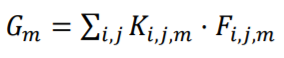

where $F$ is the input feature map of size $𝑊×𝐻×𝑀$, $𝐾$ is the depthwise convolution kernel of size $𝑊×𝐻×𝑀$, $𝐺$ is the output of size $1 × 1 × 𝑀$ the $𝑚-𝑡ℎ$ channel in $𝐺$ has only one element ${G_m}$, $(𝑖,𝑗)$ denotes the spatial position in $F$ and $𝐾$, and $𝑚$ denotes the channel index.


## 3. Light CNN

Light CNN architecure was introduced by Xiang Wu, Ran He, Zhenan Sun and Tieniu Tan in their article *'A Light CNN for Deep Face Representation with Noisy Labels'* published in 2017. The architecture is dedicated for for face recognition and face verification tasks.
In the paper the family of *'light'* architectures was presented - Light CNN-4, CNN-9 and CNN-29. The number in the model name indicates the number of convolution and max-pooling layers, e.g. Light CNN-9 consists of 9 convolution layers and 9 max-pooling layers. The MS-CELEB-1M dataset was used for models training.

In the paper, the authors defined a Max-FeatureMap (MFM) operation in order to achieve *'(...) a compact face representation and perform feature filter selection. MFM is an alternative of ReLU
to suppress low-activation neurons in each layer, so that it can
be considered as a special implementation of maxout activation to separate noisy signals and informative signals.'* The operation reduces the amount of bias that occurs because of noisy signals. The framework aiming to be fast and to provide the output used for  face recognition and verification tasks.

## 4. Evaluation metrics

Results of all contucted experiments on face verification task are evaluated with the metrics listed below. Given a pair of two face images a squared $L2$ distance threshold $D(x{_i}; x{_j})$ is used to determine the classification of same and different. All faces pairs $(i; j)$ of the same identity are denoted with $P_{same}$, whereas all pairs of different identities are denoted with $P_{diff}$. 

Chosen evaluation metrics:
$$
VAR = TPR (True Positive Rate) = \frac{TP}{TP + FN}
$$
$$
FAR = FPR (False Positive Rate) = \frac{FP}{FP + TN}
$$
$$
Accuracy = \frac{TP + TN}{TP + FP + TN + FN}
$$

where:

$
TP - predicted \ positive\ hit \ the \ actual \ positive \ (predicted: \ P_{same}$$, \ actual: \ P_{same}$$)
$
$
FP - predicted \ positive \ hit \ the \ actual \ negative \ (predicted: \ P_{same}$$, \ actual: \ P_{diff}$$)
$
$
TN - predicted \ negative \ hit \ the \ actual \ negative \ (predicted: \ P_{diff}$$, \ actual: \ P_{diff}$$)
$
$
FN - predicted \ negative \ hit \ the \ actual \ positive \ (predicted: \ P_{diff}$$, \ actual: \ P_{same}$$)
$

Relations between chosen evaluation metrics can be presented in confusion (error) matrix (see $Figure \ 4$).


$Figure \ 4. \ Confusion \ matrix.$

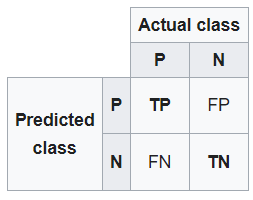

## 5. Deep Learning Metrics

In order to do deffrent experiments , to retrain existance models with new loss function or/and different parameters we use Python library PyTorch Metric Learning. This library contains different modules.

$Figure \ 5.$
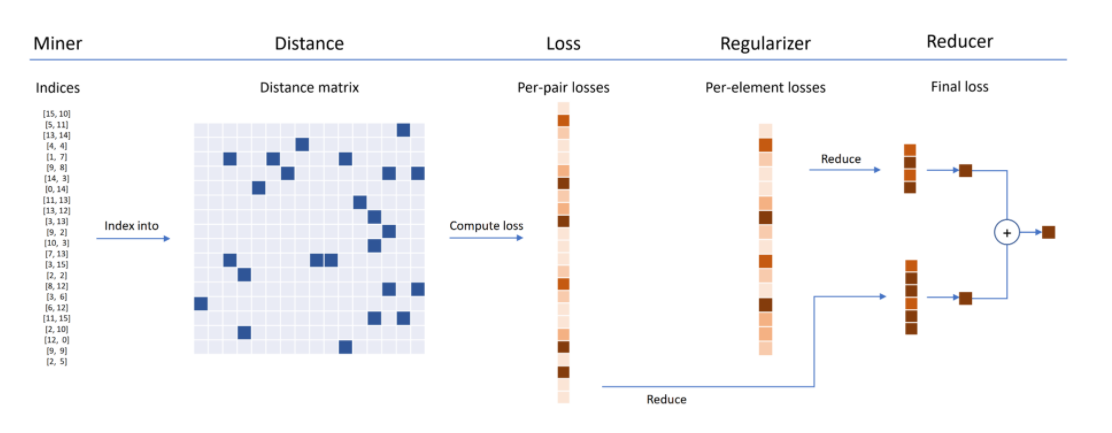

$Figure \ 6.$
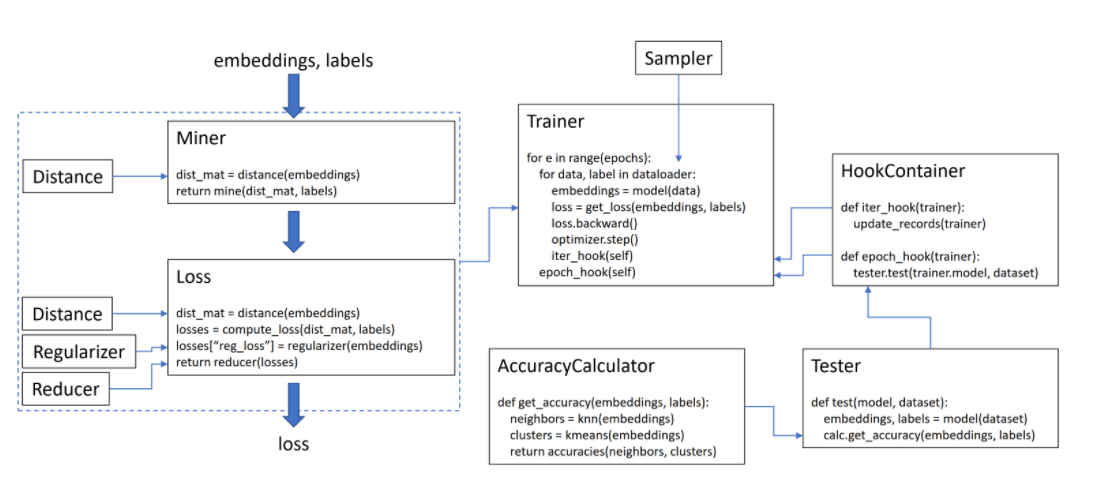

### A.Miner

#### A.1. Hard batch selection



Generating all possible triplets producing a lot of triplets that fulfill the required constraint is relativli simple task, but it would not contribute to the training and result in slower convergence. The main task is to select hard triplets, can contribute to the model improvment. Hard batch method select the hardest positive and the hardest negative representation amnong the batch and not across the whole training set what is almost unavailable and it might lead to poor training due to mislabelled and poorly imaged faces domination over the hard positives and negatives.

### B. Loss

#### B.1. Triplet Loss

Triplet Loss function based on embeddings represented by $f(x) ∈ {R^d}$ what means that an image $x$ is embedded into a $d$-dimensional Euclidean space. The embedding is constrained to live on the $d$-dimensional hypersphere, i.e. $||f(x)||{_2}$ = 1. The core idea of the function is to ensure that an image $x{^a_i}(anchor)$ of a specific person is closer to all other images $x{^p_i}(positive)$ of the same person than it is to any image $x{^n_i}(negative)$ of any other person". It is presented on $Figure \ 7$.

$Figure \ 7. \ Triplet Loss idea.$
\
($Source:$ https://arxiv.org/pdf/1503.03832.pdf)
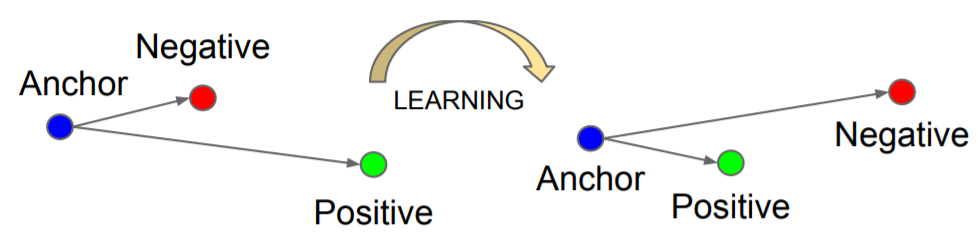

#### B.2. Additive Angular Margin Loss (ArcFace)

Additive Angular Margin Loss (ArcFace) is a method proposed in 2019 by Jiankang Deng, Jia Guo, Niannan Xueto and Stefanos Zafeiriou in the article 'ArcFace: Additive Angular Margin Loss for Deep Face Recognition'. The main goal of the new loss function was to '(...) obtain highly discriminative features for face recognition problem'. - big challenge in feature learning using Deep Convolutional Neural Networks for face recognition task. Presented ArcFace loss function gained state-of-the-art results on the MegaFace Challenge, which is the largest public face benchmark.

ArcFace loss function directly derives from loss function the most commonly used in classification tasks - soft-max loss. The soft-max loss function does not explicitly optimize the feature embedding to enforce higher similarity for intra-class samples and diversity for inter-class samples. It results in a performance gap for deep face recognition under large intra-class appearance variations. 

Fixing the bias ${b_j} = 0$ and transforming the logit as ${W^T}$j ${x_i}$ = ||${W_j}$|| ||${x_i}$ * $\cos({θ_j})$, where ${θ_j}$ is the angle between the weight ${W_j}$ and the feature ${x_i}$. The individual weight is fixed to ||${W_j}$|| $= 1$ by $L2$ normalization and the embedding feature is fixed to ||${x_i}$|| by $l2$ normalization and was re-scaled it to $s$. The normalization step on features and weights makes the predictions only depend on the angle between the feature and the weight. Due to the fact that the embedding features are distributed around each feature centre on the hypersphere, an additive angular margin penalty $m$ between ${x_i}$ and ${W_yi}$ to simultaneously enhance the intra-class compactness and inter-class discrepancy are added. Final formula for ArcFace loss function is given below:

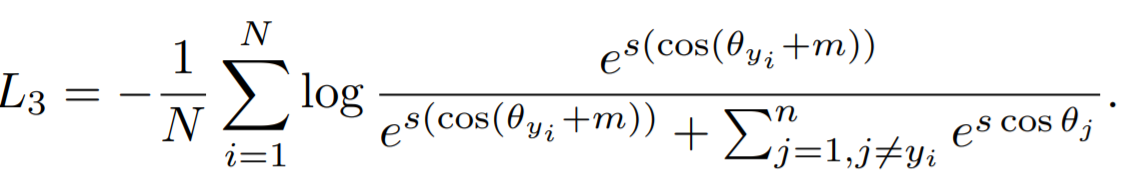 (3)

#### B.3. Lifted Structure Loss

During training with a triplet loss and generating a loss values, the full information from mini-batch is not utilized. This is due to the fact, that positive and negative examples are predefined for the given anchor example only. The core idea of the lifted structure loss is to use all pairs available in a mini-batch. Loss function make full use of a mini-batch by calculating distance matrix of pairwise distances. The method treats positive examples as an anchor to find its negative example and contribute to a loss term what makes training faster and with better converge.

### C. Reducer

#### C.1. Threshold reducer

Reducers generaly specify how to deal with many loss values in order to gain a single loss value. Threshold reducer computes the average loss, using only the losses that fall within a specified, defined by user range.

# V. Experimental research

### 1. Experiment backgroud

Main goal of our experiment was to investigate an impact of deep learing metrics on chosen evaluation metrics. Other words, we claim that Triplet Loss function is more relevant for face recognition tasks on large scale databases than common Softmax function or even ArcFace method. 

In order to prove our claim, Triplet Loss and HardBatch approach were applied for train models after transfer learning. 


<!-- 1. 3 pretrained model on LFW and on Faces DD
2. mobilefacenet with TripleLoss and HardBatch -->

## 2. Baseline models


As baseline we choose 3 models: 

1. Inception-Resnet-v1 trained on VGGFace_2 using softmax loss

2. Inception-Resnet-v1 trained on CASIA-WebFace using softmax loss

3. MobileFaceNet trained on CASIA-WebFace using ArcFaceLoss

As we see in results table performance on LFW dataset are similar for all three models, however on personal dataset ModelFaceNet perfomance is lower. At the same time (tu napisac o czasie evaluacji).

## 3. Experiments design

MobileFaceNet arhitecture. We freeze the weights for all of the network except that last four layes: Convolution 1x1, Global Depthwise Convolutio layer of 7 × 7, linear layer and batch normalization layer.

$\begin{array}{c|c|c|c|c}
mode& model & Miner& Distances & Loss & Reducer \\
\hline
Experiment\ A& MobileFaceNet & BatchHardMiner  & LpDistance & TripletMarginLoss& AvgNonZeroReducer\\
Experiment\ B& MobileFaceNet & TripletMarginMiner  & CosineSimilarity & TripletMarginLoss& ThresholdReducer\\
Experiment\ C& MobileFaceNet & BatchHardMiner  & LpDistance & GeneralizedLiftedStructureLoss& MeanReducerr\\
\hline
Experiment\ A& LightCNN9 & BatchHardMiner  & LpDistance & TripletMarginLoss& AvgNonZeroReducer\\
Experiment\ B& LightCNN9 & TripletMarginMiner  & CosineSimilarity & TripletMarginLoss& ThresholdReducer\\
Experiment\ C& LightCNN9 & BatchHardMiner  & LpDistance & GeneralizedLiftedStructureLoss& MeanReducerr\\
\hline
\hline
\end{array}$

## 4. Results and conclusions


$\begin{array}{c|c|c|c|c}
mode& model & data & accuracy & TPR & FPR & flops\\
\hline
baseline& Inception\ resnet\ v1\ (vggface2)& LFW & 99.94\% & 84.52\%  & 0.02\% & xx\\
baseline& Inception\ resnet\ v1\ (casia)& LFW & xx\% & xx\% & xx\% & xx\\
\hline
baselined& MobileFaceNet& LFW & 99.93\% &  81.18\% & 0.02\% & 184.48\\
\hline
Experiment\ A& MobileFaceNet\ with\ TripleLoss\ and\ Hardbatch& LFW & 99.94\% &  83.06\% & 0.02\% & 179.83\\
Experiment\ B&  MobileFaceNet\ with& LFW & 99.93\% &  82.43\% & 0.02\% & 176.11\\
Experiment\ C&  MobileFaceNet\ with& LFW & 99.94\% &  83.07\% & 0.02\% & 180.97\\
\hline
baselined& LightCNN9& LFW & 99.94\% &  83.39\% & 0.01\% & 717.76\\
\hline
Experiment\ A& LightCNN9\ with\ TripleLoss\ and\ Hardbatch& LFW & 99.87\% &  63.29\% & 0.03\% & 694.80\\
Experiment\ B& LightCNN9\ with& LFW & 99.93\% &  80.34\% & 0.01\% & 684.00\\
Experiment\ C& LightCNN9\ with& LFW & 99.93\% &  81.55\% & 0.01\% & 638.74\\
\hline
baseline& Inception\ resnet\ v1\ (vggface2) & FacesDD & 90.05\% & 77.58\% & 4.00\%  & xx\\
baseline& Inception\ resnet\ v1\ (casia) & FacesDD & 89.43\% & 77.79\% &  5.01\% & xx\\
\hline
baseline& MobileFaceNet & FacesDD & 81.88\% & 63.87\% & 9.53\% & 188.46\\
\hline
Experiment\ A& MobileFaceNet\ with\ TripleLoss\ and\ Hardbatch& FacesDD & 84.98\% & 65.66\% &  5.79\% & 181.60\\
Experiment\ B& MobileFaceNet\ with& FacesDD & 83.97\% & 65.63\% & 7.27\% & 177.51\\
Experiment\ C& MobileFaceNet\ with& FacesDD & 84.98\% &  65.62\% & 5.78\% & 100.42\\
\hline
baseline& LightCNN & FacesDD & 83.77\% & 62.76\% & 6.20\% & 721.68\\
\hline
Experiment\ A& LightCNN9\ with\ TripleLoss\ and\ Hardbatch& FacesDD & 78.05\% &  48.93\% & 8.05\% & 435.28\\
Experiment\ B& LightCNN9\ with& FacesDD & 82.80\% &  58.53\% & 5.61\% & 471.08\\
Experiment\ C& LightCNN9\ with& FacesDD & 83.25\% &  60.70\% & 5.98\% & 647.72\\
\hline
\end{array}$

#Bibliography/References

[1] Florian Schroff, Dmitry Kalenichenko, James Philbin. *'FaceNet: A Unified Embedding for Face Recognition and Clustering'* 2015. https://arxiv.org/pdf/1503.03832v3.pdf

[2] C. Szegedy, W. Liu, Y. Jia, P. Sermanet, S. Reed, D. Anguelov, D. Erhan, V. Vanhoucke, and A. Rabinovich. *'Going deeper with convolutions'*, https://arxiv.org/pdf/1409.4842.pdf

[3] Christian Szegedy, Sergey Ioffe, Vincent Vanhoucke, Alex Alemi. *'Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning'* 2016. https://arxiv.org/pdf/1602.07261.pdf

[4] Shun Lei Myat, Aung Nway. *'CHILD FACE RECOGNITION SYSTEM USING
MOBILEFACENET'* https://www.uit.edu.mm/wp-content/uploads/2020/05/ANO-14.pdf

[5] https://github.com/davidsandberg/facenet

[6] https://github.com/timesler/facenet-pytorch

[7] https://github.com/tbmoon/facenet

[8] http://vis-www.cs.umass.edu/lfw/

[9] Sheng Chen, Yang Liu, Xiang Gao, Zhen Han. *'MobileFaceNets: Efficient CNNs for Accurate RealTime Face Verification on Mobile Devices.'* https://arxiv.org/ftp/arxiv/papers/1804/1804.07573.pdf

[10] Alexander Hermans, Lucas Beyer,  Bastian Leibe *'In Defense of the Triplet Loss for Person Re-Identification'* https://arxiv.org/pdf/1703.07737.pdf

[11] https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

[12] Xiang Wu, Ran He, Zhenan Sun and Tieniu Tan in their article *'A Light CNN for Deep Face Representation with Noisy Labels'*, https://arxiv.org/pdf/1511.02683.pdf